In [16]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Loading Bill Line dust climatology: 

In [2]:
df = pd.read_csv('Dust_LatLon_Drobo_Complete_June2022_Jesse - Data LatLon.csv')

In [3]:
df_dust = df[df["Jesse Check"] == "x"]

In [4]:
df_dust

,Date (YYYYMMDD),YYYY,M,D,latitude,longitude,start time (UTC),Jesse Check,Notes,New GOES Notes,Julian day,GOES Raw,GOES Images,Unnamed: 13,Unnamed: 14,Unnamed: 15
24,20010116.0,2001.0,1.0,16.0,30.3,-107.4,1900.0,x,NaN,Northern CHH,NaN,NaN,NaN,NaN,NaN,20010504.0
25,20010116.0,2001.0,1.0,16.0,29.3,-106.9,1900.0,x,NaN,Central CHH,NaN,NaN,NaN,NaN,NaN,20010505.0
26,20010116.0,2001.0,1.0,16.0,28.6,-106.7,1930.0,x,NaN,"Subtle, Central CHH",NaN,NaN,NaN,NaN,NaN,20010516.0
27,20010125.0,2001.0,1.0,25.0,31.1,-107.9,1930.0,x,NaN,Northern CHH,NaN,NaN,NaN,NaN,NaN,20010517.0
28,20010127.0,2001.0,1.0,27.0,31.2,-107.9,2000.0,x,NaN,"Cloud coverage, northern CHH",NaN,NaN,NaN,NaN,NaN,20010520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,20201223.0,2020.0,12.0,23.0,38.0,-101.7,1530.0,x,NaN,KS,NaN,NaN,NaN,NaN,NaN,NaN
2350,20201229.0,2020.0,12.0,29.0,29.3,-106.8,1930.0,x,NaN,CHH,NaN,NaN,NaN,NaN,NaN,NaN
2351,20201229.0,2020.0,12.0,29.0,28.9,-106.9,1930.0,x,NaN,CHH,NaN,NaN,NaN,NaN,NaN,NaN
2352,20201229.0,2020.0,12.0,29.0,29.0,-104.8,2000.0,x,NaN,CHH,NaN,NaN,NaN,NaN,NaN,NaN


### Using monthly-mean geopotential height: 
* climatology averaged between 1981 and 2010
* https://psl.noaa.gov/data/gridded/data.narr.html

In [13]:
file = 'hgt_mon_ltm.nc'

In [14]:
hgt_ds = xr.open_dataset(file)

/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/indexing.py:560: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [25]:
hgt_ds

<xarray.Dataset>
Dimensions:             (level: 29, nbnds: 2, time: 12, x: 349, y: 277)
Coordinates:
  * level               (level) float32 1000.0 975.0 950.0 ... 150.0 125.0 100.0
  * x                   (x) float32 0.0 32463.0 ... 11264660.0 11297120.0
  * y                   (y) float32 0.0 32463.0 64926.0 ... 8927325.0 8959788.0
    lat                 (y, x) float32 1.000001 1.104305 ... 46.64134 46.3544
    lon                 (y, x) float32 -145.5 -145.315 ... -2.643617 -2.569891
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] 2180-01-01 ... 2201-12-02
    hgt                 (time, level, y, x) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NARR
    history:        created 2005/07 by Hoop (netCDF2.3)
    comments:       Data is from North American Regional Reanalysis\n(8x/day)...
    institution:    National Centers for Environmental Prediction
    platform:       Model
    dataset_title:  NCEP North American Regional Reanalysis (NARR)
    corrected:      ltm was 1979-2008. correct to 1981-2010 mar 2017
    references:     https://www.esrl.noaa.gov/psd/data/gridded/data.narr.html
    source:         http://www.emc.ncep.noaa.gov/mmb/rreanl/index.html
    References:     http://wwwt.emc.ncep.noaa.gov/mmb/rreanl/index.html\n

In [29]:
level = 500  #hPa
time = hgt_ds.time[0] #month

hgt_ds_sel = hgt_ds.sel(level=level, time=time)

In [30]:
hgt_ds_sel

<xarray.Dataset>
Dimensions:             (nbnds: 2, x: 349, y: 277)
Coordinates:
    level               float32 500.0
  * x                   (x) float32 0.0 32463.0 ... 11264660.0 11297120.0
  * y                   (y) float32 0.0 32463.0 64926.0 ... 8927325.0 8959788.0
    lat                 (y, x) float32 1.000001 1.104305 ... 46.64134 46.3544
    lon                 (y, x) float32 -145.5 -145.315 ... -2.643617 -2.569891
    time                object 0001-01-01 00:00:00
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (nbnds) datetime64[ns] 2180-01-01 2201-01-01
    hgt                 (y, x) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NARR
    history:        created 2005/07 by Hoop (netCDF2.3)
    comments:       Data is from North American Regional Reanalysis\n(8x/day)...
    institution:    National Centers for Environmental Prediction
    platform:       Model
    dataset_title:  NCEP North American Regional Reanalysis (NARR)
    corrected:      ltm was 1979-2008. correct to 1981-2010 mar 2017
    references:     https://www.esrl.noaa.gov/psd/data/gridded/data.narr.html
    source:         http://www.emc.ncep.noaa.gov/mmb/rreanl/index.html
    References:     http://wwwt.emc.ncep.noaa.gov/mmb/rreanl/index.html\n

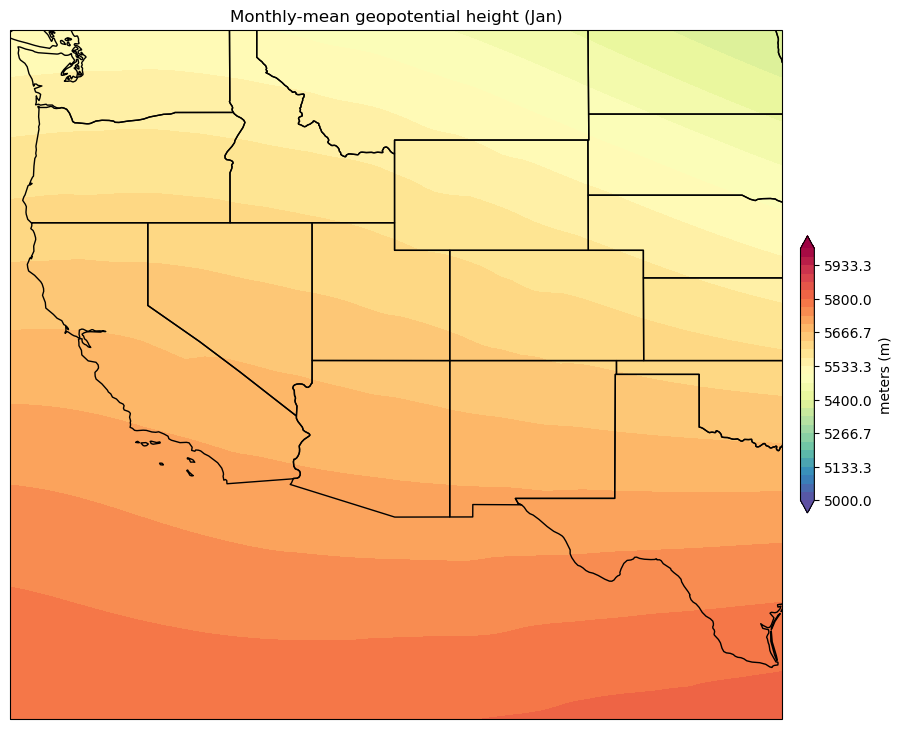

In [34]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r
levels = np.linspace(5000, 6000, 31)

ax.set_extent([-125, -97, 24, 49], crs=ccrs.PlateCarree())
c=ax.contourf(hgt_ds_sel.lon, hgt_ds_sel.lat, hgt_ds_sel.hgt, cmap=cmap, levels=levels, extend='both')
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('Monthly-mean geopotential height (Jan)')
clb.set_label('meters (m)')


ax.add_feature(cfeature.STATES)